In [7]:
import os, shutil

original_dataset_dir = '/home/hajar/examples/dcdata/data/'

base_dir = '/home/hajar/examples/dcdata/dogs-vs-cats-small/'

In [8]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [10]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [11]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 73s 733ms/step - loss: 0.6928 - acc: 0.5305 - val_loss: 0.6745 - val_acc: 0.5860
Epoch 2/30
100/100 [==============================] - 70s 695ms/step - loss: 0.6529 - acc: 0.6280 - val_loss: 0.6315 - val_acc: 0.6510
Epoch 3/30
100/100 [==============================] - 70s 704ms/step - loss: 0.6088 - acc: 0.6605 - val_loss: 0.6071 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 68s 685ms/step - loss: 0.5610 - acc: 0.7055 - val_loss: 0.5956 - val_acc: 0.6860
Epoch 5/30
100/100 [==============================] - 70s 698ms/step - loss: 0.5389 - acc: 0.7300 - val_loss: 0.6292 - val_acc: 0.6490
Epoch 6/30
100/100 [==============================] - 68s 685ms/step - loss: 0.5171 - acc: 0.7385 - val_loss: 0.5799 - val_acc: 0.6970
Epoch 7/30
100/100 [==============================] - 66s 664ms/step - loss: 0.4889 - acc: 0.7645 - val_loss: 0.58

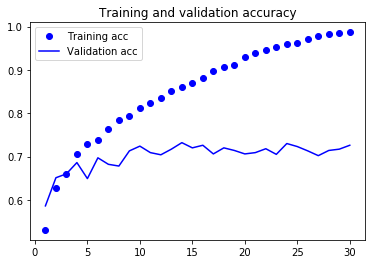

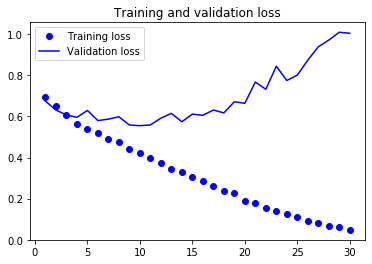

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

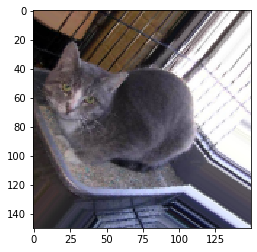

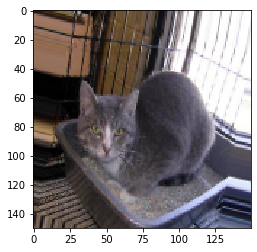

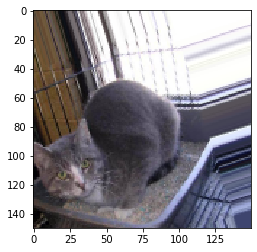

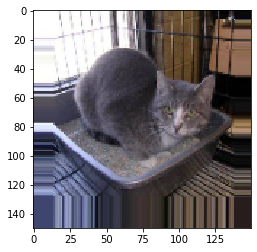

In [32]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
    fname in os.listdir(train_cats_dir)]
img_path = fnames[10]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

In [42]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=32, 
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory( 
    validation_dir, 
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
history = model.fit_generator(
    train_generator,
    steps_per_epoch=62,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=31)
model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 84s 1s/step - loss: 0.3385 - acc: 0.8547 - val_loss: 0.4387 - val_acc: 0.8145
Epoch 2/100
62/62 [==============================] - 82s 1s/step - loss: 0.3288 - acc: 0.8628 - val_loss: 0.5216 - val_acc: 0.7863
Epoch 3/100
62/62 [==============================] - 81s 1s/step - loss: 0.3292 - acc: 0.8557 - val_loss: 0.4009 - val_acc: 0.8327
Epoch 4/100
62/62 [==============================] - 85s 1s/step - loss: 0.3539 - acc: 0.8420 - val_loss: 0.3945 - val_acc: 0.8387
Epoch 5/100
62/62 [==============================] - 87s 1s/step - loss: 0.3410 - acc: 0.8577 - val_loss: 0.4127 - val_acc: 0.8115
Epoch 6/100
62/62 [==============================] - 85s 1s/step - loss: 0.3530 - acc: 0.8394 - val_loss: 0.4279 - val_acc: 0.8266
Epoch 7/100
62/62 [==============================] - 84s 1s/step - loss: 0.3303 - acc: 0.8592 - val_loss: 0.4226 - val_acc: 0.8317

62/62 [==============================] - 92s 1s/step - loss: 0.2896 - acc: 0.8786 - val_loss: 0.4892 - val_acc: 0.8196
Epoch 63/100
62/62 [==============================] - 85s 1s/step - loss: 0.2876 - acc: 0.8796 - val_loss: 0.4237 - val_acc: 0.8256
Epoch 64/100
62/62 [==============================] - 90s 1s/step - loss: 0.2662 - acc: 0.8887 - val_loss: 0.4256 - val_acc: 0.8407
Epoch 65/100
62/62 [==============================] - 86s 1s/step - loss: 0.2751 - acc: 0.8836 - val_loss: 0.4889 - val_acc: 0.8105
Epoch 66/100
62/62 [==============================] - 86s 1s/step - loss: 0.2813 - acc: 0.8826 - val_loss: 0.4883 - val_acc: 0.8367
Epoch 67/100
62/62 [==============================] - 85s 1s/step - loss: 0.2705 - acc: 0.8847 - val_loss: 0.3906 - val_acc: 0.8478
Epoch 68/100
62/62 [==============================] - 88s 1s/step - loss: 0.2846 - acc: 0.8826 - val_loss: 0.3965 - val_acc: 0.8357
Epoch 69/100
62/62 [==============================] - 91s 1s/step - loss: 0.2650 - acc: 0

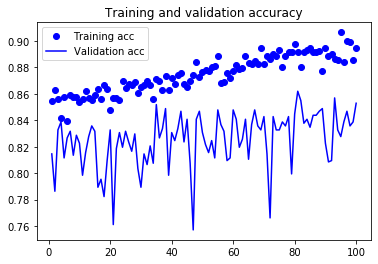

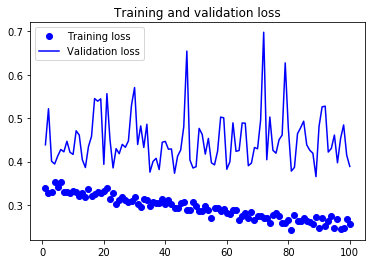

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [44]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=1000)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.8479999899864197


In [45]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=16, 
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory( 
    validation_dir, 
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary')
history2 = model.fit_generator(
    train_generator,
    steps_per_epoch=125,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=62)
model.save('cats_and_dogs_small_3.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
125/125 [==============================] - 67s 533ms/step - loss: 0.2884 - acc: 0.8785 - val_loss: 0.4963 - val_acc: 0.8246
Epoch 2/100
125/125 [==============================] - 73s 581ms/step - loss: 0.2520 - acc: 0.8930 - val_loss: 0.8798 - val_acc: 0.7560
Epoch 3/100
125/125 [==============================] - 73s 583ms/step - loss: 0.2811 - acc: 0.8815 - val_loss: 0.4156 - val_acc: 0.8438
Epoch 4/100
125/125 [==============================] - 89s 713ms/step - loss: 0.2591 - acc: 0.8925 - val_loss: 0.3951 - val_acc: 0.8518
Epoch 5/100
125/125 [==============================] - 81s 644ms/step - loss: 0.2903 - acc: 0.8770 - val_loss: 0.4015 - val_acc: 0.8377
Epoch 6/100
125/125 [==============================] - 85s 680ms/step - loss: 0.2878 - acc: 0.8845 - val_loss: 0.4409 - val_acc: 0.8327
Epoch 7/100
125/125 [==============================] - 84s 673ms/step - loss: 0.2703 - acc: 0.8845 -

125/125 [==============================] - 96s 770ms/step - loss: 0.2750 - acc: 0.8910 - val_loss: 0.4723 - val_acc: 0.8387
Epoch 61/100
125/125 [==============================] - 90s 717ms/step - loss: 0.2520 - acc: 0.8955 - val_loss: 0.4078 - val_acc: 0.8468
Epoch 62/100
125/125 [==============================] - 88s 702ms/step - loss: 0.2604 - acc: 0.8940 - val_loss: 0.4888 - val_acc: 0.8458
Epoch 63/100
125/125 [==============================] - 87s 696ms/step - loss: 0.2519 - acc: 0.8960 - val_loss: 0.5061 - val_acc: 0.8296
Epoch 64/100
125/125 [==============================] - 88s 707ms/step - loss: 0.2504 - acc: 0.8925 - val_loss: 0.4071 - val_acc: 0.8538
Epoch 65/100
125/125 [==============================] - 91s 731ms/step - loss: 0.2546 - acc: 0.9020 - val_loss: 0.6218 - val_acc: 0.8196
Epoch 66/100
125/125 [==============================] - 88s 706ms/step - loss: 0.2483 - acc: 0.9055 - val_loss: 0.4074 - val_acc: 0.8448
Epoch 67/100
125/125 [==============================] 

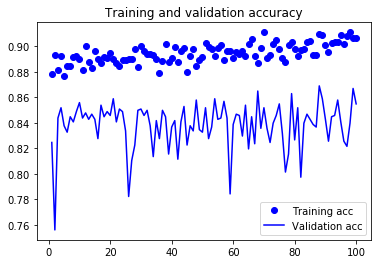

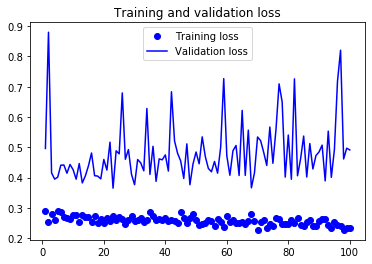

In [46]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [47]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=1000)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.8410000205039978


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory( 
    validation_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
history3 = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)
model.save('cats_and_dogs_small_4.h5')

In [ ]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=1000)
print('test acc:', test_acc)